Group 3
- Thi Truc Linh LE
- Yash kumar Jain
- Nataly Michail
- Mohamad Serhan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [2]:
df= pd.read_csv('data/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

Separate pixel values and label.

In [5]:
X = df.drop(['label'],axis = 1)
y = df['label']

### Visualize one row from the dataset.

3


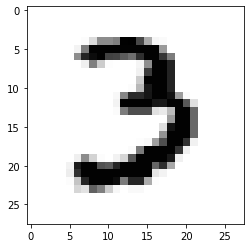

In [6]:
plt.imshow(np.array(X.loc[9]).reshape(28, 28), cmap='Greys')
print(y[9])

show all digit

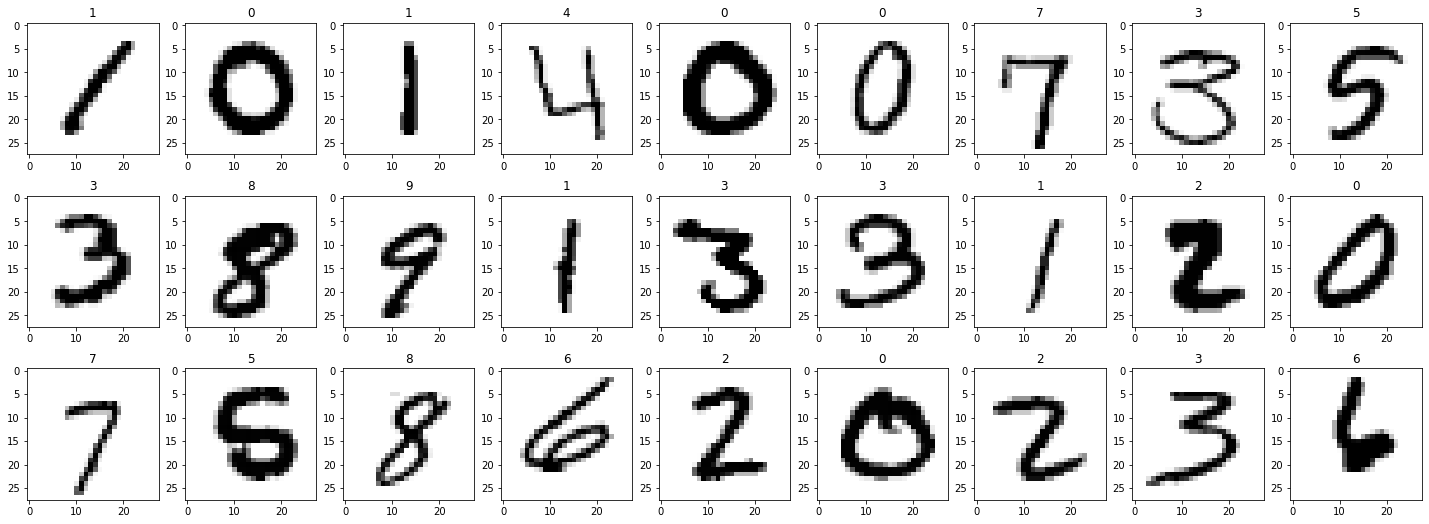

In [7]:
col = 9
row = 3
fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(25,9))
i = 0
for x in range(row):
    for z in range(col):
        img = X.iloc[i].to_numpy()
        img = img.reshape((28,28))
        axes[x,z].imshow(img,cmap = 'binary')
        axes[x,z].set_title(y.iloc[i])
        i+=1
plt.show()
        
        


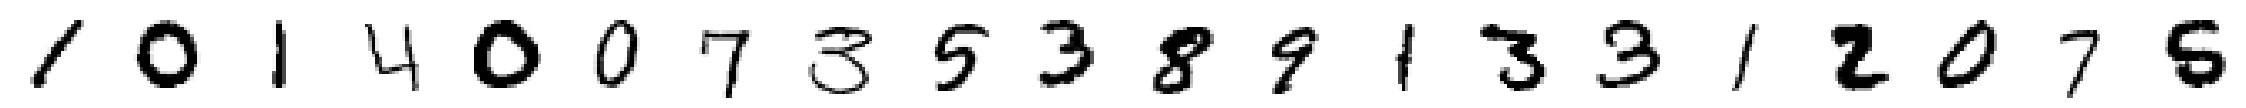

In [8]:
#method 2
import matplotlib.pyplot as plt
X_train = X.values.reshape((42000,28,28))
fig, axs = plt.subplots(1, 20, figsize=(40,20))
for i in range(20):
    axs[i].imshow(X_train[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [9]:
print([y[i] for i in range(20)])

[1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5]


### Detect Outliers

In [10]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(X)

IsolationForest()

In [11]:
outliers = pd.Series(clf.predict(X))
outliers = outliers.map(({1:0,-1:1}))

print(outliers.value_counts())

0    35627
1     6373
dtype: int64


In [14]:
print(f'Outliers percentage:{(5429/len(X))*100}')

Outliers percentage:12.926190476190477


### Dimension Reduction

In [15]:
from sklearn.preprocessing import StandardScaler
Scaler =  StandardScaler()
X = Scaler.fit_transform(X)


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 300)
X_PCA = pca.fit_transform(X)

print("Variance Ratio:", np.sum(pca.explained_variance_ratio_))

Variance Ratio: 0.9417008738512871


In [18]:
import plotly.express as px
explained_variance_ratio=[r for r in np.cumsum(pca.explained_variance_ratio_) if r<=1]
px.area(x=range(1,len(explained_variance_ratio)+1),
       y=explained_variance_ratio,
       labels={"x":"# Components","y":"Variance ratio"})

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.25)

Evaluate performance of the model.


In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve

def model_def(model, model_name, m_train_data, m_train_label):
    model.fit(m_train_data, m_train_label)
    s = "predict_"
    p = s + model_name
    p = model.predict(X_test)
    cm = confusion_matrix(y_test, p)
    precision = np.diag(cm)/np.sum(cm, axis=0)
    recall    = np.diag(cm)/np.sum(cm, axis=1)
    F1 = 2 * np.mean(precision) * np.mean(recall)/(np.mean(precision) + np.mean(recall))
    cv_score = cross_val_score(model, m_train_data, m_train_label, cv=3, scoring='accuracy')
    print("Precision Is      :", np.mean(precision))
    print("Recall Is         :", np.mean(recall))
    print("F1 Score IS       :", F1)
    print("Mean CV Score     :", cv_score.mean())
    print("Std Dev CV Score  :", cv_score.std())

In [21]:
from sklearn.svm import SVC

poly6 = SVC(C=2, kernel='poly', degree=3, gamma='auto', random_state=42)
model_def(poly6, "poly6", X_train, y_train)

Precision Is      : 0.9744136063369094
Recall Is         : 0.9745277355846056
F1 Score IS       : 0.9744706676190753
Mean CV Score     : 0.9716825396825396
Std Dev CV Score  : 0.00023756554836659307


## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components = 300)),('svc',SVC(gamma='auto',C=2,degree=3,random_state=42))]).fit(X_train,y_train)

In [ ]:
pipe.score(X_test,y_test)